In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [2]:
path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(path)
conn = engine.connect()

In [3]:
inspector = inspect(engine)

tables = inspector.get_table_names()
tables

['measurement', 'station']

In [4]:
for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
    
    # or put it as a dataframe
    display(pd.DataFrame(columns))
    
    print()

measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0



station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [5]:
query = """
        SELECT
            *
        FROM
            station;
    """
pd.read_sql(query, conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [6]:
#top 10 rows from measurement table
query = """
        SELECT
            *
        FROM
            measurement
        LIMIT 10;
    """
pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


# Measurement

In [7]:
#find most recent date in the database
query = """
        SELECT
          max(date)
        FROM
            measurement
        """

engine.execute(query).fetchall()

[('2017-08-23',)]

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

query = """
        SELECT
          *
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
        LIMIT 10;
        """

engine.execute(query).fetchall()

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0)]

In [9]:
query = """
        SELECT
            date,
            avg(prcp) as prcp
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
        GROUP BY
            date
        ORDER BY
            date;
        """
# Save the query results as a Pandas DataFrame and set the index to the date column


df = pd.read_sql(query, conn)
df.head()

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   prcp    366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [11]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   prcp    366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [12]:
df2 = df.set_index('date')
df2

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [13]:
df2.head()

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


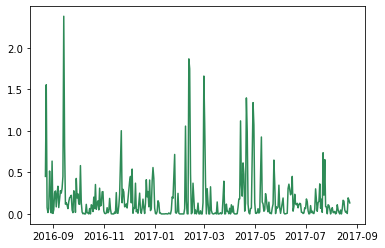

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(df["date"], df["prcp"], color="seagreen")
plt.show()

# Station

In [16]:
# Design a query to calculate the total number stations in the dataset

query = """
        SELECT
            count(station)
        FROM
            station;
    """
engine.execute(query).fetchall()

[(9,)]

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

query = """
        SELECT
            s.station,
            s.name,
            count(m.id) as observations
        FROM
            measurement m
            JOIN station s on m.station = s.station
        GROUP BY
            s.station,
            s.name
        ORDER BY
            observations desc;
        """

pd.read_sql(query, conn)

,station,name,observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

query = """
        SELECT
            *
        FROM
            measurement
        WHERE
            station = 'USC00519281';
        """

pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,12188,USC00519281,2010-01-01,0.15,70.0
1,12189,USC00519281,2010-01-02,0.00,62.0
2,12190,USC00519281,2010-01-03,0.00,74.0
3,12191,USC00519281,2010-01-04,0.00,75.0
4,12192,USC00519281,2010-01-05,0.00,74.0
...,...,...,...,...,...
2767,14955,USC00519281,2017-08-14,0.00,77.0
2768,14956,USC00519281,2017-08-15,0.32,77.0
2769,14957,USC00519281,2017-08-16,0.12,76.0
2770,14958,USC00519281,2017-08-17,0.01,76.0


In [19]:


query = """
        SELECT
            station,
            min(tobs) as min_temp,
            max(tobs) as max_temp,
            avg(tobs) as avg_temp
        FROM
            measurement
        WHERE
            station = 'USC00519281';
        """

pd.read_sql(query, conn)

,station,min_temp,max_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = """
        SELECT
            station,
            date,
            tobs
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
        AND station = 'USC00519281'
        ORDER BY
            date asc
        """

df2 = pd.read_sql(query, conn)
df2["date"] = pd.to_datetime(df2["date"])
df2.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


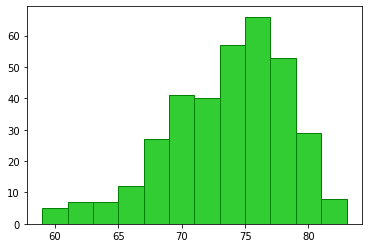

In [21]:
plt.hist(df2.tobs, bins=12, edgecolor="green", color="limegreen")
plt.show()

In [22]:
# Close Session
# session.close()

In [23]:
conn.close()